# (Stock) Index Creation and Analysis

## Data Import, Visualization & Normalization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use("seaborn")
pd.options.display.float_format = '{:.2f}'.format

In [2]:
stocks = yf.download(["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"], 
                     start = "2014-01-01", end = "2018-12-31")

[*********************100%***********************]  6 of 6 completed


In [3]:
stocks.head()

Adj Close                                 Close               \
                AMZN     BA   DIS    IBM    KO  MSFT  AMZN     BA   DIS   
Date                                                                      
2014-01-02     19.90 116.81 70.19 125.38 30.98 31.72 19.90 136.67 76.27   
2014-01-03     19.82 117.62 70.05 126.13 30.82 31.51 19.82 137.62 76.11   
2014-01-06     19.68 118.30 69.78 125.70 30.68 30.85 19.68 138.41 75.82   
2014-01-07     19.90 120.09 70.26 128.20 30.77 31.08 19.90 140.51 76.34   
2014-01-08     20.10 120.35 69.23 127.03 30.43 30.53 20.10 140.82 75.22   

                   ...  Open                       Volume                     \
              IBM  ...   DIS    IBM    KO  MSFT      AMZN       BA       DIS   
Date               ...                                                         
2014-01-02 177.37  ... 76.04 178.98 41.12 37.35  42756000  3366700   5200900   
2014-01-03 178.43  ... 76.30 177.66 40.68 37.20  44204000  3177400   4060700   
2014-01-06 177.82  ... 76.53 178.92 40.48 36.85  63412000  4196500   6816200   
2014-01-07 181.37  ... 76.12 178.19 40.48 36.33  38320000  4238500   4494900   
2014-01-08 179.70  ... 76.13 181.00 40.44 36.00  46330000  4236100  10900300   

                                         
                IBM        KO      MSFT  
Date                                     
2014-01-02  4755639  12698600  30632200  
2014-01-03  4250107  10403400  31134800  
2014-01-06  4254919  11036300  43603700  
2014-01-07  6205186  11872300  35802800  
2014-01-08  4815470  15339600  59971700  

[5 rows x 36 columns]

In [4]:
stocks.tail()

Adj Close                                 Close                \
                AMZN     BA    DIS   IBM    KO  MSFT  AMZN     BA    DIS   
Date                                                                       
2018-12-21     68.87 295.93 102.96 89.38 42.58 94.57 68.87 304.55 104.22   
2018-12-24     67.20 285.83  99.14 86.67 41.14 90.62 67.20 294.16 100.35   
2018-12-26     73.54 305.04 104.55 89.75 42.02 96.81 73.54 313.93 105.83   
2018-12-27     73.08 308.16 105.23 91.67 42.55 97.41 73.08 317.14 106.52   
2018-12-28     73.90 307.43 106.00 91.07 42.25 96.65 73.90 316.38 107.30   

                   ...   Open                         Volume           \
              IBM  ...    DIS    IBM    KO   MSFT       AMZN       BA   
Date               ...                                                  
2018-12-21 106.06  ... 106.47 107.55 47.26 101.63  272806000  7641700   
2018-12-24 102.84  ... 103.23 105.07 47.62  97.68  144400000  3435300   
2018-12-26 106.49  ... 100.49 103.25 45.88  95.14  208236000  4843400   
2018-12-27 108.78  ... 104.41 105.15 46.74  99.30  194440000  4341100   
2018-12-28 108.06  ... 107.28 109.20 47.89 102.09  176580000  3725200   

                                                     
                 DIS       IBM        KO       MSFT  
Date                                                 
2018-12-21  15530600  10864279  32477700  111242100  
2018-12-24   7133000   3997184  10733700   43935200  
2018-12-26   9422800   6951507  14342600   51634800  
2018-12-27   8201400   6323698  16966500   49498500  
2018-12-28   7620500   5352905  13218200   38196300  

[5 rows x 36 columns]

In [5]:
stocks.to_csv("index_stocks.csv")

In [3]:
stocks = pd.read_csv("index_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0]).Close

In [7]:
stocks

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,136.67,76.27,177.37,40.66,37.16
2014-01-03,19.82,137.62,76.11,178.43,40.46,36.91
2014-01-06,19.68,138.41,75.82,177.82,40.27,36.13
2014-01-07,19.90,140.51,76.34,181.37,40.39,36.41
2014-01-08,20.10,140.82,75.22,179.70,39.94,35.76
...,...,...,...,...,...,...
2018-12-21,68.87,304.55,104.22,106.06,47.57,98.23
2018-12-24,67.20,294.16,100.35,102.84,45.96,94.13
2018-12-26,73.54,313.93,105.83,106.49,46.94,100.56


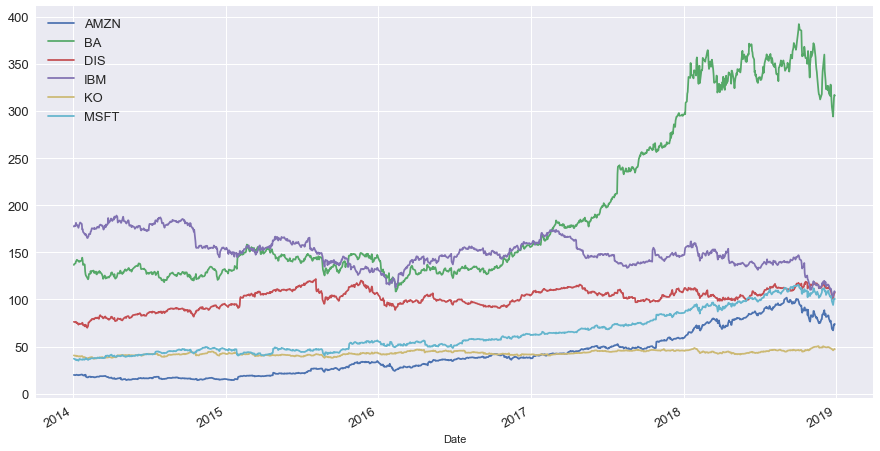

In [8]:
stocks.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [4]:
norm = stocks.div(stocks.iloc[0]).mul(100)
norm

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23
...,...,...,...,...,...,...
2018-12-21,346.12,222.84,136.65,59.80,116.99,264.34
2018-12-24,337.70,215.23,131.57,57.98,113.03,253.31
2018-12-26,369.60,229.70,138.76,60.04,115.45,270.61


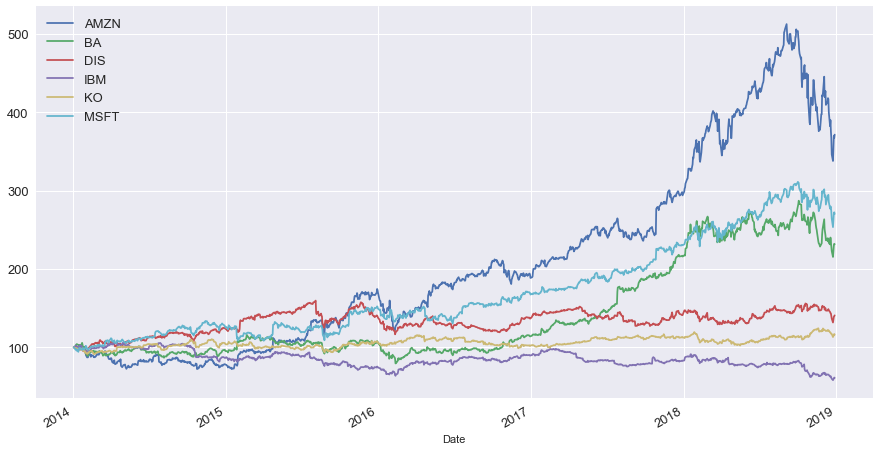

In [10]:
norm.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Creating a Price-weighted Index

In [11]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,136.67,76.27,177.37,40.66,37.16
2014-01-03,19.82,137.62,76.11,178.43,40.46,36.91
2014-01-06,19.68,138.41,75.82,177.82,40.27,36.13
2014-01-07,19.90,140.51,76.34,181.37,40.39,36.41
2014-01-08,20.10,140.82,75.22,179.70,39.94,35.76


In [12]:
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23


In [13]:
stocks.sum(axis = 1)[0]

488.0294361114502

In [14]:
stocks.sum(axis = 1).div(stocks.sum(axis = 1)[0]).mul(100) 

Date
2014-01-02   100.00
2014-01-03   100.27
2014-01-06   100.02
2014-01-07   101.41
2014-01-08   100.72
              ...  
2018-12-21   149.48
2018-12-24   144.38
2018-12-26   153.13
2018-12-27   154.55
2018-12-28   154.34
Length: 1257, dtype: float64

In [7]:
norm["PWI"] = stocks.sum(axis = 1).div(stocks.sum(axis = 1)[0]).mul(100)

In [17]:
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT,PWI
Date,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72


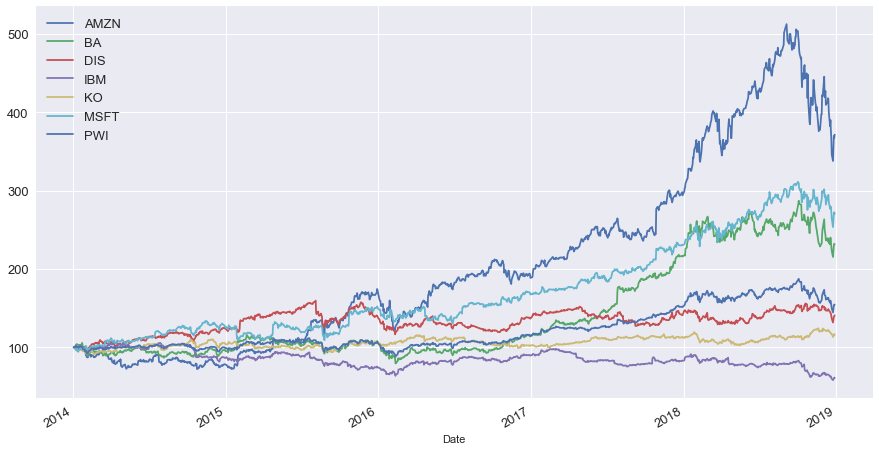

In [19]:
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

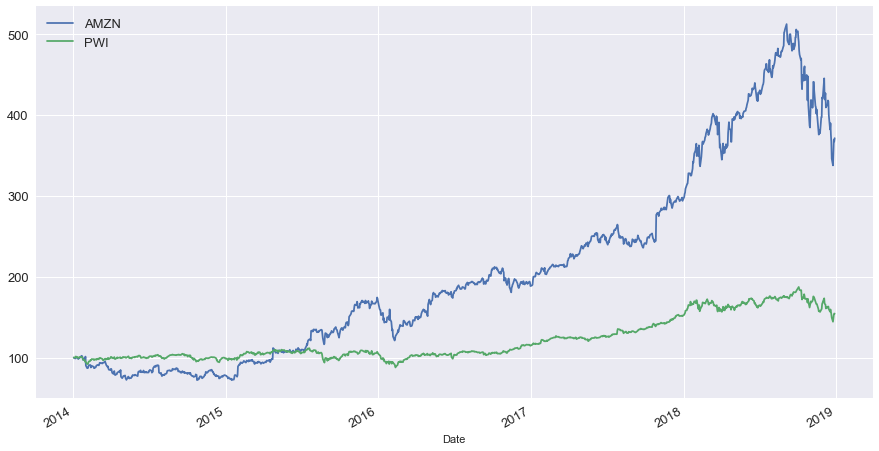

In [20]:
norm.loc[:, ["AMZN", "PWI"]].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

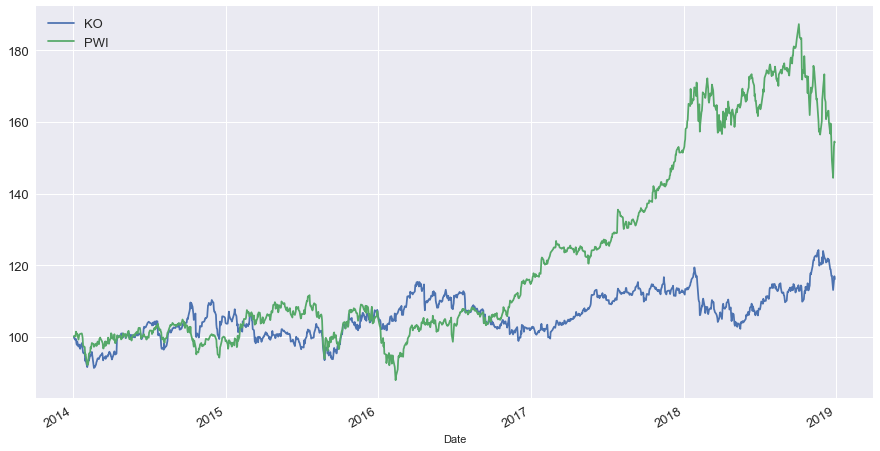

In [21]:
norm.loc[:, ["KO", "PWI"]].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [22]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,136.67,76.27,177.37,40.66,37.16
2014-01-03,19.82,137.62,76.11,178.43,40.46,36.91
2014-01-06,19.68,138.41,75.82,177.82,40.27,36.13
2014-01-07,19.90,140.51,76.34,181.37,40.39,36.41
2014-01-08,20.10,140.82,75.22,179.70,39.94,35.76


In [25]:
stocks.div(stocks.sum(axis = "columns"), axis = "rows")

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.04,0.28,0.16,0.36,0.08,0.08
2014-01-03,0.04,0.28,0.16,0.36,0.08,0.08
2014-01-06,0.04,0.28,0.16,0.36,0.08,0.07
2014-01-07,0.04,0.28,0.15,0.37,0.08,0.07
2014-01-08,0.04,0.29,0.15,0.37,0.08,0.07
...,...,...,...,...,...,...
2018-12-21,0.09,0.42,0.14,0.15,0.07,0.13
2018-12-24,0.10,0.42,0.14,0.15,0.07,0.13
2018-12-26,0.10,0.42,0.14,0.14,0.06,0.13


In [26]:
weights_PWI = stocks.div(stocks.sum(axis = 1), axis = "rows")

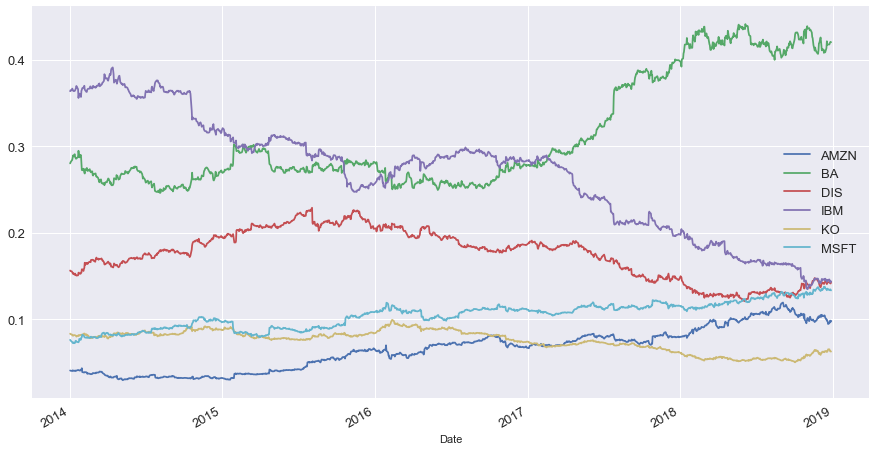

In [27]:
weights_PWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Creating an Equal-weighted Index

In [28]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,136.67,76.27,177.37,40.66,37.16
2014-01-03,19.82,137.62,76.11,178.43,40.46,36.91
2014-01-06,19.68,138.41,75.82,177.82,40.27,36.13
2014-01-07,19.90,140.51,76.34,181.37,40.39,36.41
2014-01-08,20.10,140.82,75.22,179.70,39.94,35.76


In [29]:
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT,PWI
Date,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72


In [9]:
ret = stocks.pct_change().dropna()

In [10]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01


In [11]:
ret["Mean_ret"] = ret.mean(axis = 1)

In [33]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,Mean_ret
Date,,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01,-0.00
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02,-0.01
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.01
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01,-0.00


In [8]:
norm["EWI"] = 100

In [35]:
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI
Date,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27,100
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02,100
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41,100
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72,100


In [36]:
ret.Mean_ret.add(1).cumprod().mul(100)

Date
2014-01-03    99.92
2014-01-06    99.35
2014-01-07   100.41
2014-01-08    99.72
2014-01-09    99.52
              ...  
2018-12-21   175.33
2018-12-24   169.44
2018-12-26   179.08
2018-12-27   180.59
2018-12-28   180.44
Name: Mean_ret, Length: 1256, dtype: float64

In [12]:
norm.iloc[1:, -1] = ret.Mean_ret.add(1).cumprod().mul(100)

In [13]:
norm

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI
Date,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27,99.92
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02,99.35
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41,100.41
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72,99.72
...,...,...,...,...,...,...,...,...
2018-12-21,346.12,222.84,136.65,59.80,116.99,264.34,149.48,175.33
2018-12-24,337.70,215.23,131.57,57.98,113.03,253.31,144.38,169.44
2018-12-26,369.60,229.70,138.76,60.04,115.45,270.61,153.13,179.08


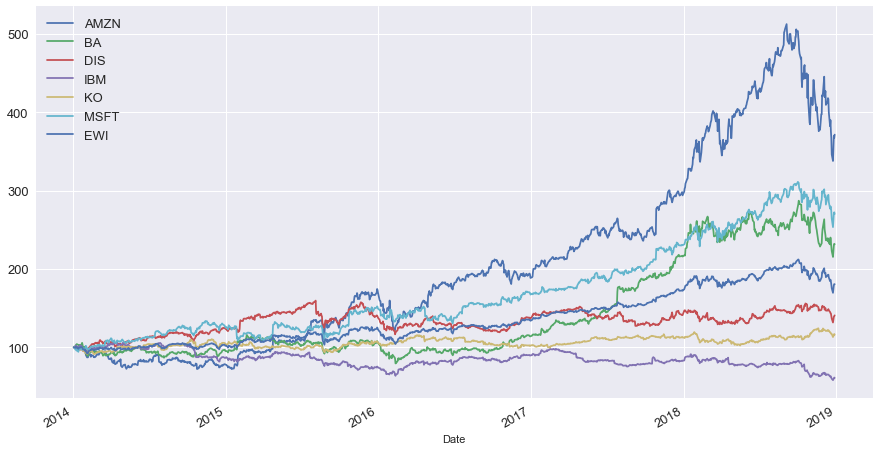

In [39]:
norm.iloc[:, [0, 1, 2, 3, 4, 5, 7]].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

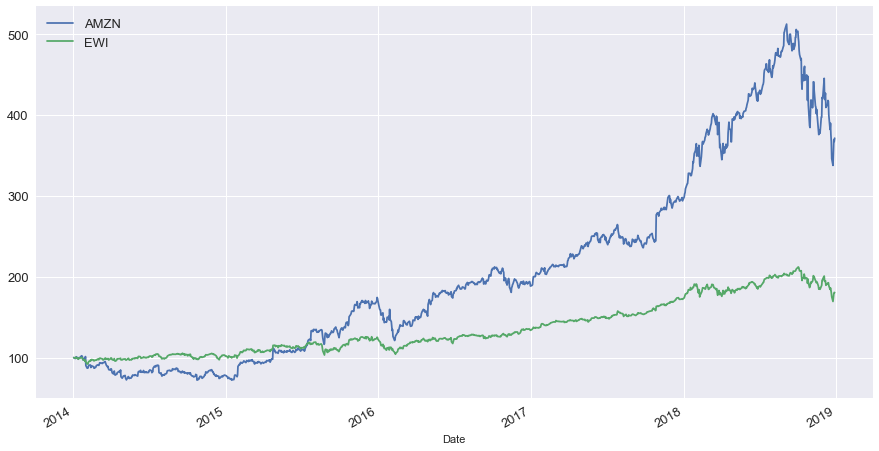

In [40]:
norm.loc[:, ["AMZN", "EWI"]].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

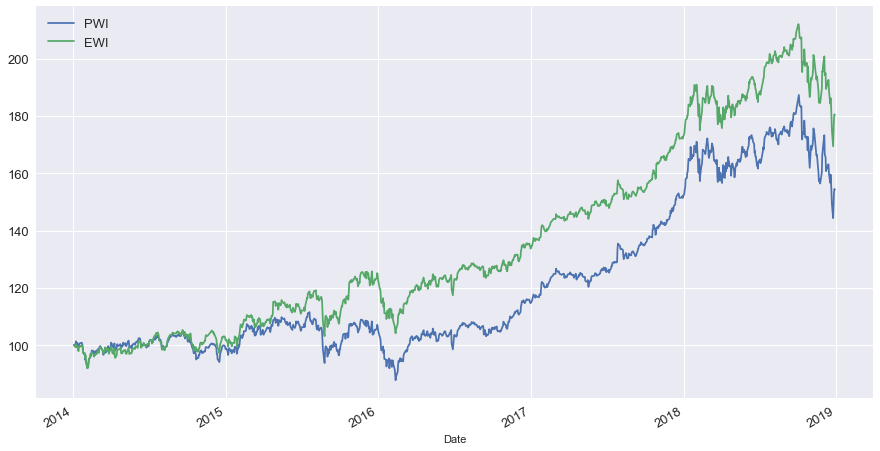

In [41]:
norm.iloc[:, -2:].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [42]:
weights_EWI = stocks.copy()

In [43]:
weights_EWI.iloc[:,:] = (1/6)

In [44]:
weights_EWI

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.17,0.17,0.17,0.17,0.17,0.17
2014-01-03,0.17,0.17,0.17,0.17,0.17,0.17
2014-01-06,0.17,0.17,0.17,0.17,0.17,0.17
2014-01-07,0.17,0.17,0.17,0.17,0.17,0.17
2014-01-08,0.17,0.17,0.17,0.17,0.17,0.17
...,...,...,...,...,...,...
2018-12-21,0.17,0.17,0.17,0.17,0.17,0.17
2018-12-24,0.17,0.17,0.17,0.17,0.17,0.17
2018-12-26,0.17,0.17,0.17,0.17,0.17,0.17


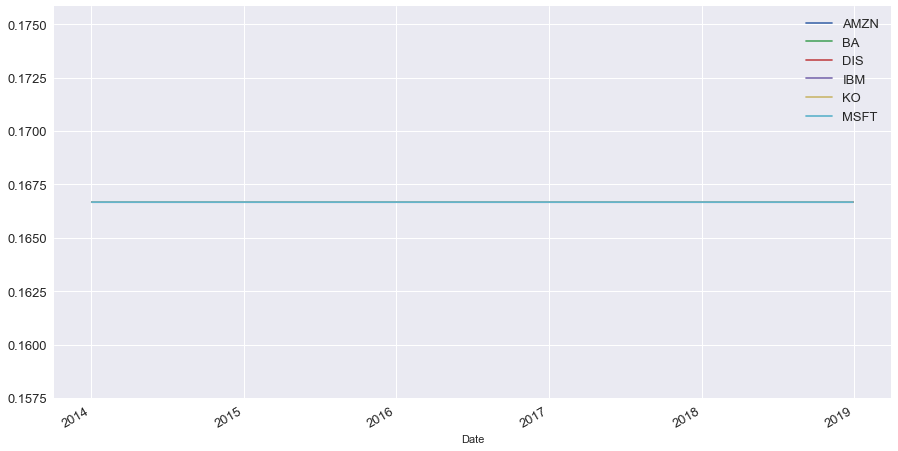

In [45]:
weights_EWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Creating a Value-weighted Index (Part 1)

In [23]:
stocks

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,136.67,76.27,177.37,40.66,37.16
2014-01-03,19.82,137.62,76.11,178.43,40.46,36.91
2014-01-06,19.68,138.41,75.82,177.82,40.27,36.13
2014-01-07,19.90,140.51,76.34,181.37,40.39,36.41
2014-01-08,20.10,140.82,75.22,179.70,39.94,35.76
...,...,...,...,...,...,...
2018-12-21,68.87,304.55,104.22,106.06,47.57,98.23
2018-12-24,67.20,294.16,100.35,102.84,45.96,94.13
2018-12-26,73.54,313.93,105.83,106.49,46.94,100.56


In [6]:
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23


In [14]:
listings = pd.read_csv("../data/listings_clean.csv")

In [15]:
listings.head()

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
0,A,NYSE,"Agilent Technologies, Inc.",81.68,25934696179.92,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,NYSE,Alcoa Corporation,29.15,5407809589.60,2016,Basic Industries,Aluminum
2,AABA,NASDAQ,Altaba Inc.,75.39,42781131315.30,1969,Technology,EDP Services
3,AAC,NYSE,"AAC Holdings, Inc.",2.16,53141086.80,2014,Health Care,Medical Specialities
4,AAL,NASDAQ,"American Airlines Group, Inc.",34.02,15276869742.96,1969,Transportation,Air Freight/Delivery Services


In [16]:
listings.tail()

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
6847,ZUMZ,NASDAQ,Zumiez Inc.,26.72,681919062.56,2005,Consumer Services,Clothing/Shoe/Accessory Stores
6848,ZUO,NYSE,"Zuora, Inc.",19.79,2147266454.00,2018,Technology,Computer Software: Prepackaged Software
6849,ZYME,NYSE,Zymeworks Inc.,15.74,504078206.26,2017,Health Care,Major Pharmaceuticals
6850,ZYNE,NASDAQ,"Zynerba Pharmaceuticals, Inc.",7.85,165399468.60,2015,Health Care,Major Pharmaceuticals
6851,ZYXI,NASDAQ,"Zynex, Inc.",5.02,161834880.48,1969,Health Care,Biotechnology: Electromedical & Electrotherape...


In [17]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6852 entries, 0 to 6851
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      6852 non-null   object 
 1   Exchange    6852 non-null   object 
 2   Name        6852 non-null   object 
 3   Last_Price  6852 non-null   float64
 4   Market_Cap  5954 non-null   float64
 5   IPO_Year    6852 non-null   int64  
 6   Sector      5309 non-null   object 
 7   Industry    5309 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 428.4+ KB


In [18]:
listings.set_index("Symbol", inplace = True)

In [19]:
listings.head()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.68,25934696179.92,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.15,5407809589.60,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.39,42781131315.30,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.16,53141086.80,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.02,15276869742.96,1969,Transportation,Air Freight/Delivery Services


In [20]:
ticker = ["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"]

In [21]:
listings = listings.loc[ticker, ["Last_Price", "Market_Cap"]]

In [22]:
listings

,Last_Price,Market_Cap
Symbol,,
AMZN,1847.33,907413834783.70
BA,364.94,206002047212.28
DIS,117.16,210609322989.68
IBM,143.02,127268671933.12
KO,46.64,199393520886.56
MSFT,120.19,922123334074.74


In [24]:
listings.Market_Cap.div(listings.Last_Price)

Symbol
AMZN    491202890.00
BA      564481962.00
DIS    1797621398.00
IBM     889866256.00
KO     4275161254.00
MSFT   7672213446.00
dtype: float64

In [25]:
listings["Shares"] = listings.Market_Cap.div(listings.Last_Price)

In [26]:
listings

,Last_Price,Market_Cap,Shares
Symbol,,,
AMZN,1847.33,907413834783.70,491202890.00
BA,364.94,206002047212.28,564481962.00
DIS,117.16,210609322989.68,1797621398.00
IBM,143.02,127268671933.12,889866256.00
KO,46.64,199393520886.56,4275161254.00
MSFT,120.19,922123334074.74,7672213446.00


In [27]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,136.67,76.27,177.37,40.66,37.16
2014-01-03,19.82,137.62,76.11,178.43,40.46,36.91
2014-01-06,19.68,138.41,75.82,177.82,40.27,36.13
2014-01-07,19.90,140.51,76.34,181.37,40.39,36.41
2014-01-08,20.10,140.82,75.22,179.70,39.94,35.76


In [28]:
stocks.tail()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2018-12-21,68.87,304.55,104.22,106.06,47.57,98.23
2018-12-24,67.20,294.16,100.35,102.84,45.96,94.13
2018-12-26,73.54,313.93,105.83,106.49,46.94,100.56
2018-12-27,73.08,317.14,106.52,108.78,47.53,101.18
2018-12-28,73.90,316.38,107.30,108.06,47.20,100.39


In [ ]:
mcap = stocks.mul(listings.Shares, axis = "columns")

In [ ]:
mcap.head()

In [ ]:
mcap.tail()

In [ ]:
mcap.info()

In [ ]:
mcap.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
stocks.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Creating a Value-weighted Index (Part 2)

In [ ]:
mcap.head()

In [ ]:
mcap.sum(axis = 1)

In [ ]:
mcap.div(mcap.sum(axis = 1), axis = "index")

In [ ]:
weights_vwi = mcap.div(mcap.sum(axis = 1), axis = "index")

In [ ]:
weights_vwi.tail()

In [ ]:
weights_vwi.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title("VWI - Weights", fontsize = 15)
plt.show()

In [ ]:
ret = stocks.pct_change().dropna()
ret

In [ ]:
weights_vwi.shift().dropna()

In [ ]:
ret.mul(weights_vwi.shift().dropna()).sum(axis = 1)

In [ ]:
norm["VWI"] = 100
norm.head()

In [ ]:
ret.mul(weights_vwi.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

In [ ]:
norm.iloc[1:, -1] = ret.mul(weights_vwi.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

In [ ]:
norm

In [ ]:
norm.iloc[:, [0, 1, 2, 3, 4, 5, 8]].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
norm.head()

## Comparison of weighting methods

In [ ]:
norm.head()

In [ ]:
norm.iloc[:, -3:].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
norm.iloc[:, :-3].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
weights_PWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title("PWI - Weights", fontsize = 15)
plt.show()

In [ ]:
weights_vwi.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
weights_EWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
summary = norm.pct_change().dropna().agg(["mean", "std"]).T

In [ ]:
summary.head()

In [ ]:
summary.columns = ["Return", "Risk"]

In [ ]:
summary["Return"] = summary["Return"]*252
summary["Risk"] = summary["Risk"] * np.sqrt(252)

In [ ]:
summary

In [ ]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (15, 8), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Price Index vs. Performance/Total Return Index

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn")
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
stocks = pd.read_csv("index_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])

In [ ]:
stocks.head()

In [ ]:
adj_close = stocks["Adj Close"].copy()

In [ ]:
total_return = adj_close.pct_change().dropna()

In [ ]:
total_return.head()

In [ ]:
close = stocks["Close"].copy()

In [ ]:
weights = close.div(close.sum(axis = 1), axis = "index")

In [ ]:
weights.head()

In [ ]:
norm["PWI_perf"] = 100
norm.head()

In [ ]:
norm.iloc[1:, -1] = total_return.mul(weights.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

In [ ]:
norm

In [ ]:
summary = norm.pct_change().dropna().agg(["mean", "std"]).T

In [ ]:
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"] * np.sqrt(252)

In [ ]:
summary

In [ ]:
norm.iloc[:, [6, 9]].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()